<a href="https://colab.research.google.com/github/Badu1230/Badu1230/blob/main/Pima_Indians_Diabetes_Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Définir le chemin et le séparateur
separateur = ","
path = "/content/diabetes.csv"

# Lire le fichier CSV en utilisant pandas
df = pd.read_csv(path, sep=separateur)

df.shape

(768, 9)

In [27]:
# Statistiques descriptives

print(df.dtypes)
print(df.describe())

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.

In [3]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
print(display(df.head()))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


None


In [24]:
#Grouper par une catégorie ('Outcome') et calculer des statistiques

grouped_by_outcome = df.groupby('Outcome').mean()
display(grouped_by_outcome)
print(grouped_by_outcome.mean())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Pregnancies                   4.081836
Glucose                     125.618731
BloodPressure                69.504313
SkinThickness                20.914090
Insulin                      84.563910
BMI                          32.723369
DiabetesPedigreeFunction      0.490117
Age                          34.128582
dtype: float64


In [17]:
#Trier les groupes par une variable (Glucose)

sorted_by_glucose = df.sort_values(by='Glucose', ascending=False)
print(sorted_by_glucose)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
661            1      199             76             43        0  42.9   
561            0      198             66             32      274  41.3   
228            4      197             70             39      744  36.7   
8              2      197             70             45      543  30.5   
579            2      197             70             99        0  34.7   
..           ...      ...            ...            ...      ...   ...   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   
182            1        0             74             20       23  27.7   
75             1        0             48             20        0  24.7   

     DiabetesPedigreeFunction  Age  Outcome  
661                     1.394   22        1  
561                

In [20]:
# 4. Prétraiter les données

# Vérifier les valeurs manquantes

print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [23]:
# Remplir les valeurs manquantes avec la moyenne (pour les colonnes numériques)
df.fillna(df.mean(), inplace=True)

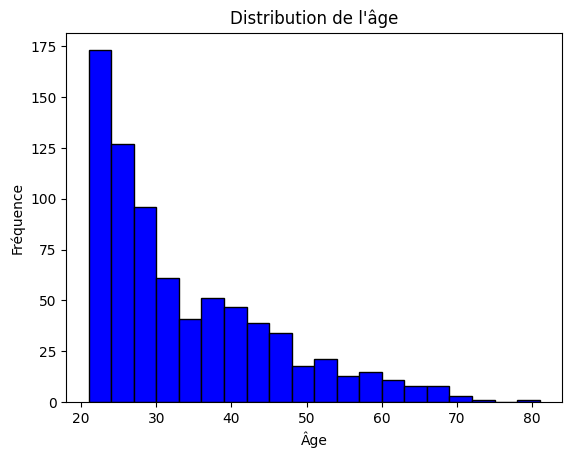

In [34]:
import matplotlib.pyplot as plt

data = df

# Histogramme simple pour la colonne 'Age'
plt.hist(data['Age'], bins=20, color='blue', edgecolor='black')

# Ajouter un titre et des labels
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()


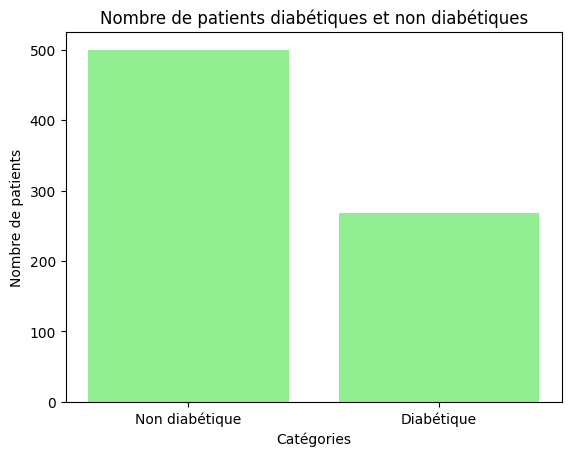

In [35]:
# Données
categories = ["Non diabétique", "Diabétique"]
values = data['Outcome'].value_counts()  # Compte le nombre de 0 (non diabétique) et 1 (diabétique)

# Tracer un diagramme à barres
plt.bar(categories, values, color='lightgreen')
plt.title("Nombre de patients diabétiques et non diabétiques")
plt.xlabel("Catégories")
plt.ylabel("Nombre de patients")
plt.show()

<ipython-input-36-53ec1c4bf10d>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = data.groupby(['AgeGroup', 'Outcome']).size().unstack()


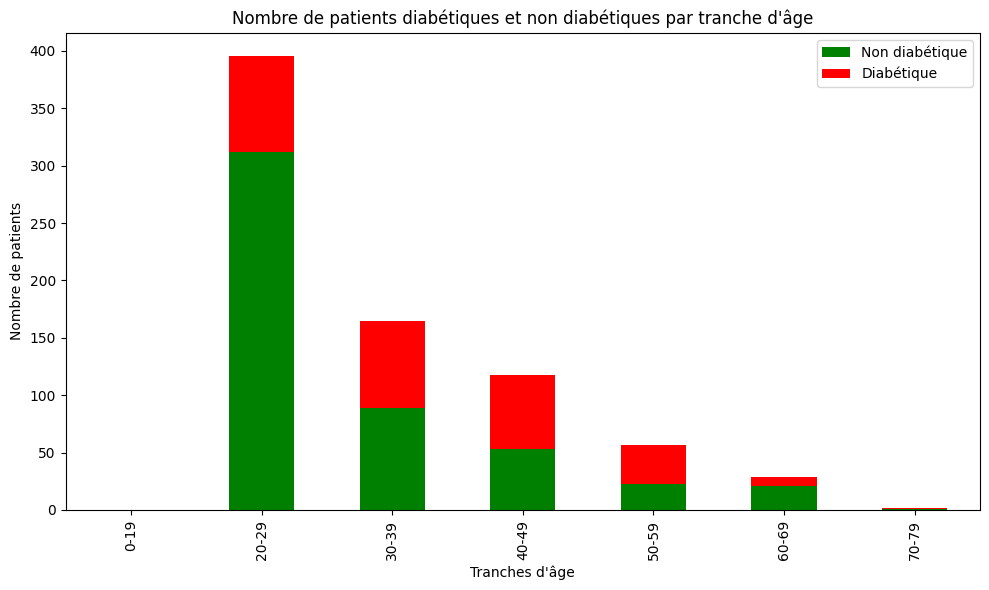

In [36]:
# Créer des tranches d'âge
bins = [0, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Compter les diabétiques et non diabétiques par tranche d'âge
age_group_counts = data.groupby(['AgeGroup', 'Outcome']).size().unstack()

# Tracer un diagramme à barres empilées
age_group_counts.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))

# Ajouter des détails au graphique
plt.title("Nombre de patients diabétiques et non diabétiques par tranche d'âge")
plt.xlabel("Tranches d'âge")
plt.ylabel("Nombre de patients")
plt.legend(['Non diabétique', 'Diabétique'])
plt.tight_layout()

# Afficher le graphique
plt.show()


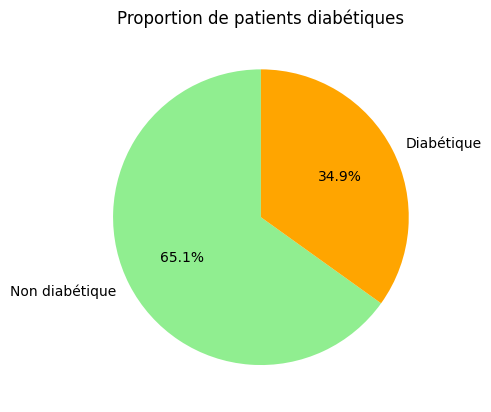

In [44]:
# Données
labels = ["Non diabétique", "Diabétique"]
sizes = data['Outcome'].value_counts()  # Comptage des 0 (non diabétique) et 1 (diabétique)
colors = ["lightgreen", "orange"]

# Tracer un diagramme circulaire
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Proportion de patients diabétiques")
plt.show()

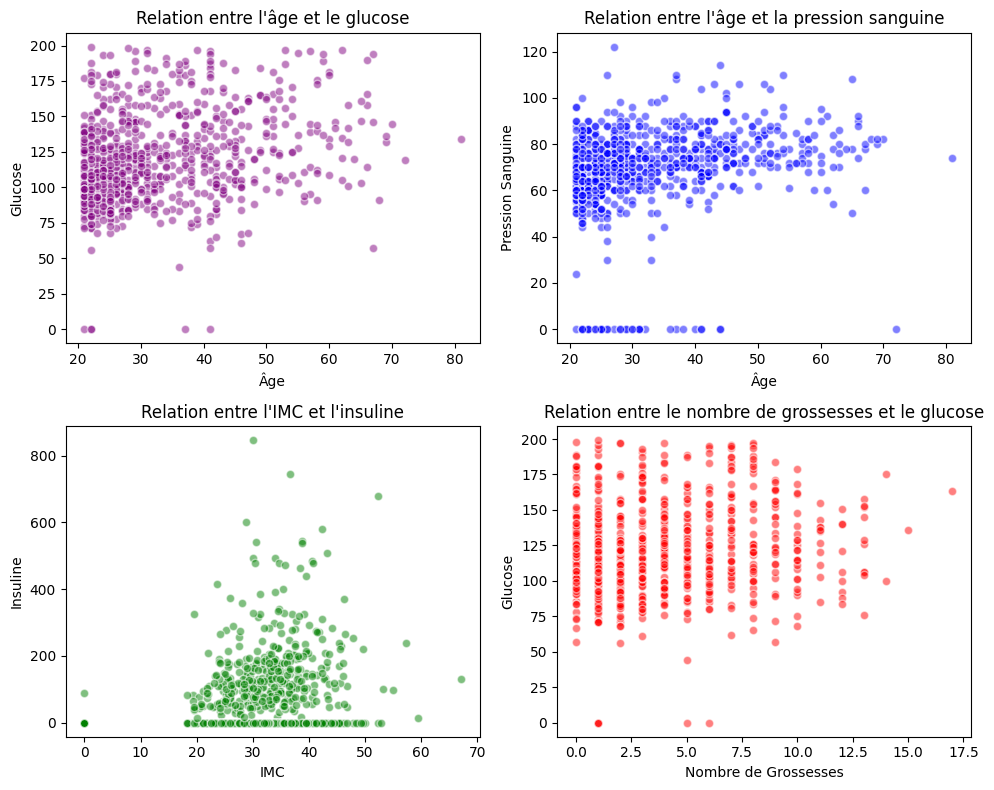

In [56]:

#Affichez plusieurs graphiques sur une seule figure en utilisant des sous-graphes pourune comparaison plus facile.
 # Créez une figure avec 2 lignes et 2 colonnes de sous-graphes
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Graphique 1 : Relation entre l'âge et le glucose
axs[0, 0].scatter(data['Age'], data['Glucose'], color='purple', alpha=0.5, edgecolors='w')
axs[0, 0].set_title("Relation entre l'âge et le glucose")
axs[0, 0].set_xlabel('Âge')
axs[0, 0].set_ylabel('Glucose')

# Graphique 2 : Relation entre l'âge et la pression sanguine
axs[0, 1].scatter(data['Age'], data['BloodPressure'], color='blue', alpha=0.5, edgecolors='w')
axs[0, 1].set_title("Relation entre l'âge et la pression sanguine")
axs[0, 1].set_xlabel('Âge')
axs[0, 1].set_ylabel('Pression Sanguine')

# Graphique 3 : Relation entre l'IMC et l'insuline
axs[1, 0].scatter(data['BMI'], data['Insulin'], color='green', alpha=0.5, edgecolors='w')
axs[1, 0].set_title("Relation entre l'IMC et l'insuline")
axs[1, 0].set_xlabel('IMC')
axs[1, 0].set_ylabel('Insuline')

# Graphique 4 : Relation entre le nombre de grossesses et le glucose
axs[1, 1].scatter(data['Pregnancies'], data['Glucose'], color='red', alpha=0.5, edgecolors='w')
axs[1, 1].set_title("Relation entre le nombre de grossesses et le glucose")
axs[1, 1].set_xlabel('Nombre de Grossesses')
axs[1, 1].set_ylabel('Glucose')

# Ajustez l'espace entre les sous-graphes
plt.tight_layout()

# Affichez la figure
plt.show()

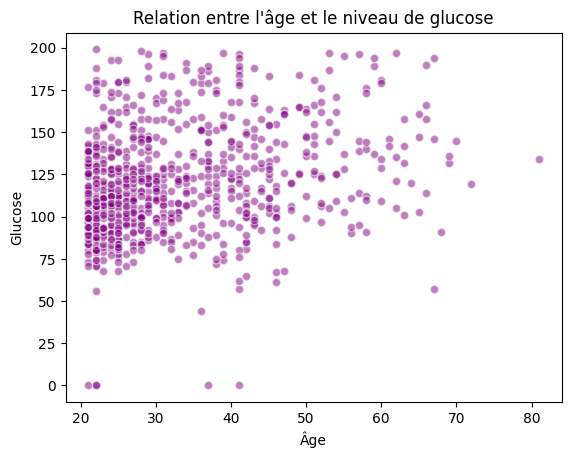

In [55]:
# Nuage de points pour visualiser la relation entre deux variables comme l'âge et le niveau de glucose.
plt.scatter(data['Age'], data['Glucose'], color='purple', alpha=0.5, edgecolors='w')
plt.title("Relation entre l'âge et le niveau de glucose")
plt.xlabel('Âge')
plt.ylabel('Glucose')
plt.show()
